In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)  # Set is_slippery=False for deterministic

In [3]:
# Hyperparameters
alpha = 0.8         # Learning rate
gamma = 0.95        # Discount factor
epsilon = 1.0       # Exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
num_episodes = 2000
max_steps = 100

In [4]:
# Initialize Q-table
state_size = env.observation_space.n  # Number of states (4x4 grid = 16)
action_size = env.action_space.n      # Number of actions (left, down, right, up = 4)
Q = np.zeros((state_size, action_size))

In [5]:


# Track rewards
rewards = []

# Q-learning Algorithm
for episode in range(num_episodes):
    state = env.reset()[0]
    total_reward = 0

    for _ in range(max_steps):
        # ε-greedy action selection
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])        # Exploit

        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-table using Bellman Equation
        best_next_action = np.max(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * best_next_action - Q[state, action])

        state = next_state
        total_reward += reward

        if done:
            break

    # Decay exploration rate
    epsilon = max(epsilon_min, epsilon * epsilon_decay)

    rewards.append(total_reward)

    if (episode + 1) % 100 == 0:
        print(f"Episode {episode+1}, Avg Reward: {np.mean(rewards[-100:]):.2f}, Epsilon: {epsilon:.3f}")

/Users/anveshradharapu/Library/Caches/pypoetry/virtualenvs/mlengineerprep-fSSVlCLJ-py3.11/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100, Avg Reward: 0.00, Epsilon: 0.606
Episode 200, Avg Reward: 0.01, Epsilon: 0.367
Episode 300, Avg Reward: 0.02, Epsilon: 0.222
Episode 400, Avg Reward: 0.09, Epsilon: 0.135
Episode 500, Avg Reward: 0.20, Epsilon: 0.082
Episode 600, Avg Reward: 0.26, Epsilon: 0.049
Episode 700, Avg Reward: 0.31, Epsilon: 0.030
Episode 800, Avg Reward: 0.26, Epsilon: 0.018
Episode 900, Avg Reward: 0.36, Epsilon: 0.011
Episode 1000, Avg Reward: 0.47, Epsilon: 0.010
Episode 1100, Avg Reward: 0.62, Epsilon: 0.010
Episode 1200, Avg Reward: 0.53, Epsilon: 0.010
Episode 1300, Avg Reward: 0.55, Epsilon: 0.010
Episode 1400, Avg Reward: 0.55, Epsilon: 0.010
Episode 1500, Avg Reward: 0.62, Epsilon: 0.010
Episode 1600, Avg Reward: 0.51, Epsilon: 0.010
Episode 1700, Avg Reward: 0.53, Epsilon: 0.010
Episode 1800, Avg Reward: 0.46, Epsilon: 0.010
Episode 1900, Avg Reward: 0.43, Epsilon: 0.010
Episode 2000, Avg Reward: 0.53, Epsilon: 0.010


In [6]:
# Final Q-table
print("\nFinal Q-Table:")
print(Q)


Final Q-Table:
[[2.91271948e-01 2.00446630e-01 2.57636856e-02 4.32158526e-02]
 [4.84568873e-03 1.96833518e-03 1.10008142e-03 5.67976126e-02]
 [5.24697000e-03 2.56260700e-03 7.03899959e-03 7.08541649e-03]
 [2.35523315e-03 5.72473760e-03 2.51545111e-04 7.10534904e-03]
 [3.65257367e-01 2.68720145e-03 4.41195136e-03 1.92422564e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.00201985e-03 2.74615669e-06 2.88854261e-04 2.54405433e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.05127401e-02 1.11950529e-02 6.04643994e-03 1.99732745e-01]
 [9.11119895e-03 1.53503856e-01 5.01218572e-03 3.34441601e-02]
 [3.11399816e-01 7.65484757e-04 7.43525234e-03 1.07860844e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.91542006e-03 1.20829561e-01 3.45235706e-01 7.27006829e-02]
 [2.64096150e-01 8.70470702e-01 8.82737579e-02 1.82351625e-01]
 [0.00000000e+00 0.00000000e+00 0.00000

In [7]:
# Moving average of rewards
def moving_avg(x, window=100):
    return np.convolve(x, np.ones(window)/window, mode='valid')

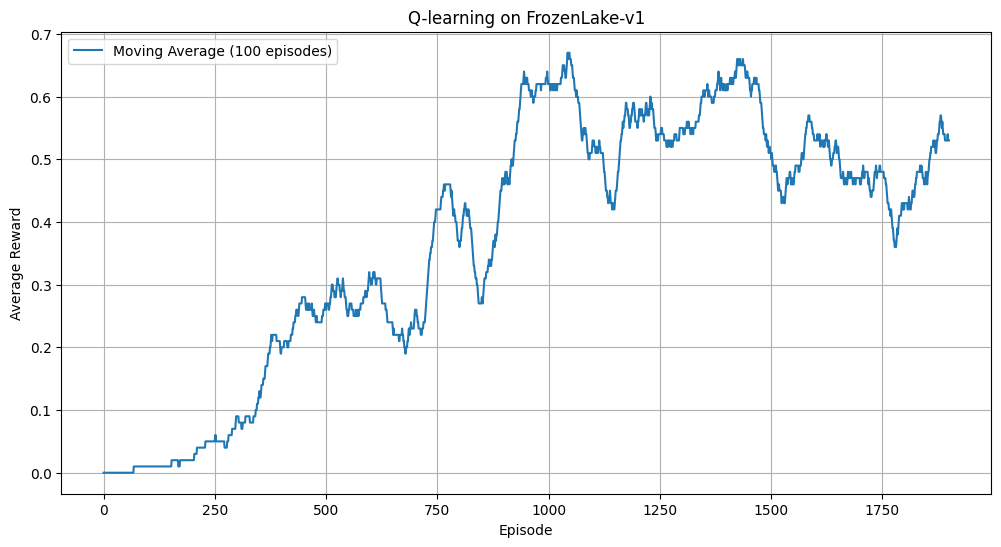

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(moving_avg(rewards), label='Moving Average (100 episodes)')
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Q-learning on FrozenLake-v1")
plt.legend()
plt.grid()
plt.show()
